# Survival Time Analysis

Many thanks to [DataTab](https://www.youtube.com/@datatab) and [BioStatSquid](https://www.youtube.com/@biostatsquid)!

# Cox Regression

In [8]:
!curl -L -o datasets/uci-bank-marketing-dataset.zip https://www.kaggle.com/api/v1/datasets/download/janiobachmann/bank-marketing-dataset
!unzip -u datasets/uci-bank-marketing-dataset.zip 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  142k  100  142k    0     0   337k      0 --:--:-- --:--:-- --:--:--  337k
Archive:  datasets/uci-bank-marketing-dataset.zip
  inflating: bank.csv                


In [19]:
from lifelines import CoxPHFitter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## EDA and Preprocessing

### Feature Selection

In [ ]:
# Explore predictors
uci_bank_marketing_dataset = pd.read_csv('datasets/bank.csv')
print(uci_bank_marketing_dataset.shape)
uci_bank_marketing_dataset.head()

(11162, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
print(uci_bank_marketing_dataset.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


### Predictor selection, ensuring minimal multicollinearity

<Axes: >

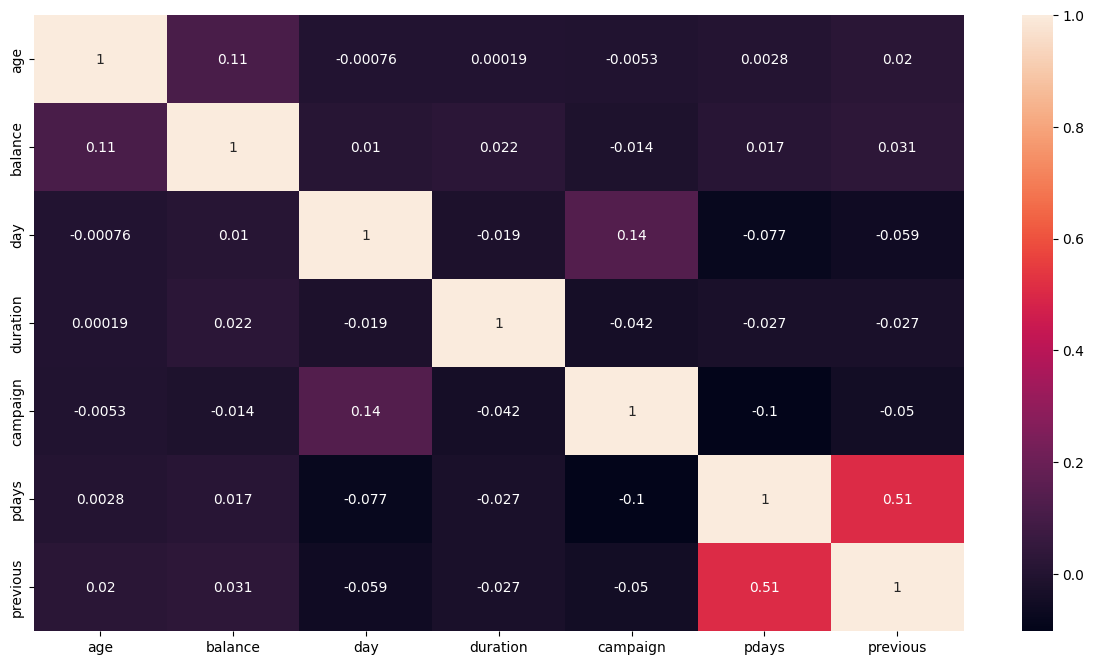

In [ ]:
response_variable = 'deposit'
predictor_variables = [predictor for predictor in uci_bank_marketing_dataset.columns if predictor != response_variable]

predictors_df = uci_bank_marketing_dataset[predictor_variables]
response_df = uci_bank_marketing_dataset[response_variable]

# Phase one: numerical predictors only
cm = predictors_df.corr(numeric_only=True)
plt.figure(figsize=(15, 8))
sns.heatmap(cm, xticklabels=cm.columns, yticklabels=cm.columns, annot=True)

In [ ]:
# One-hot encoding categoricals for next phase
predictors_df2 = pd.get_dummies(predictors_df, dtype=np.float64)


<Axes: >

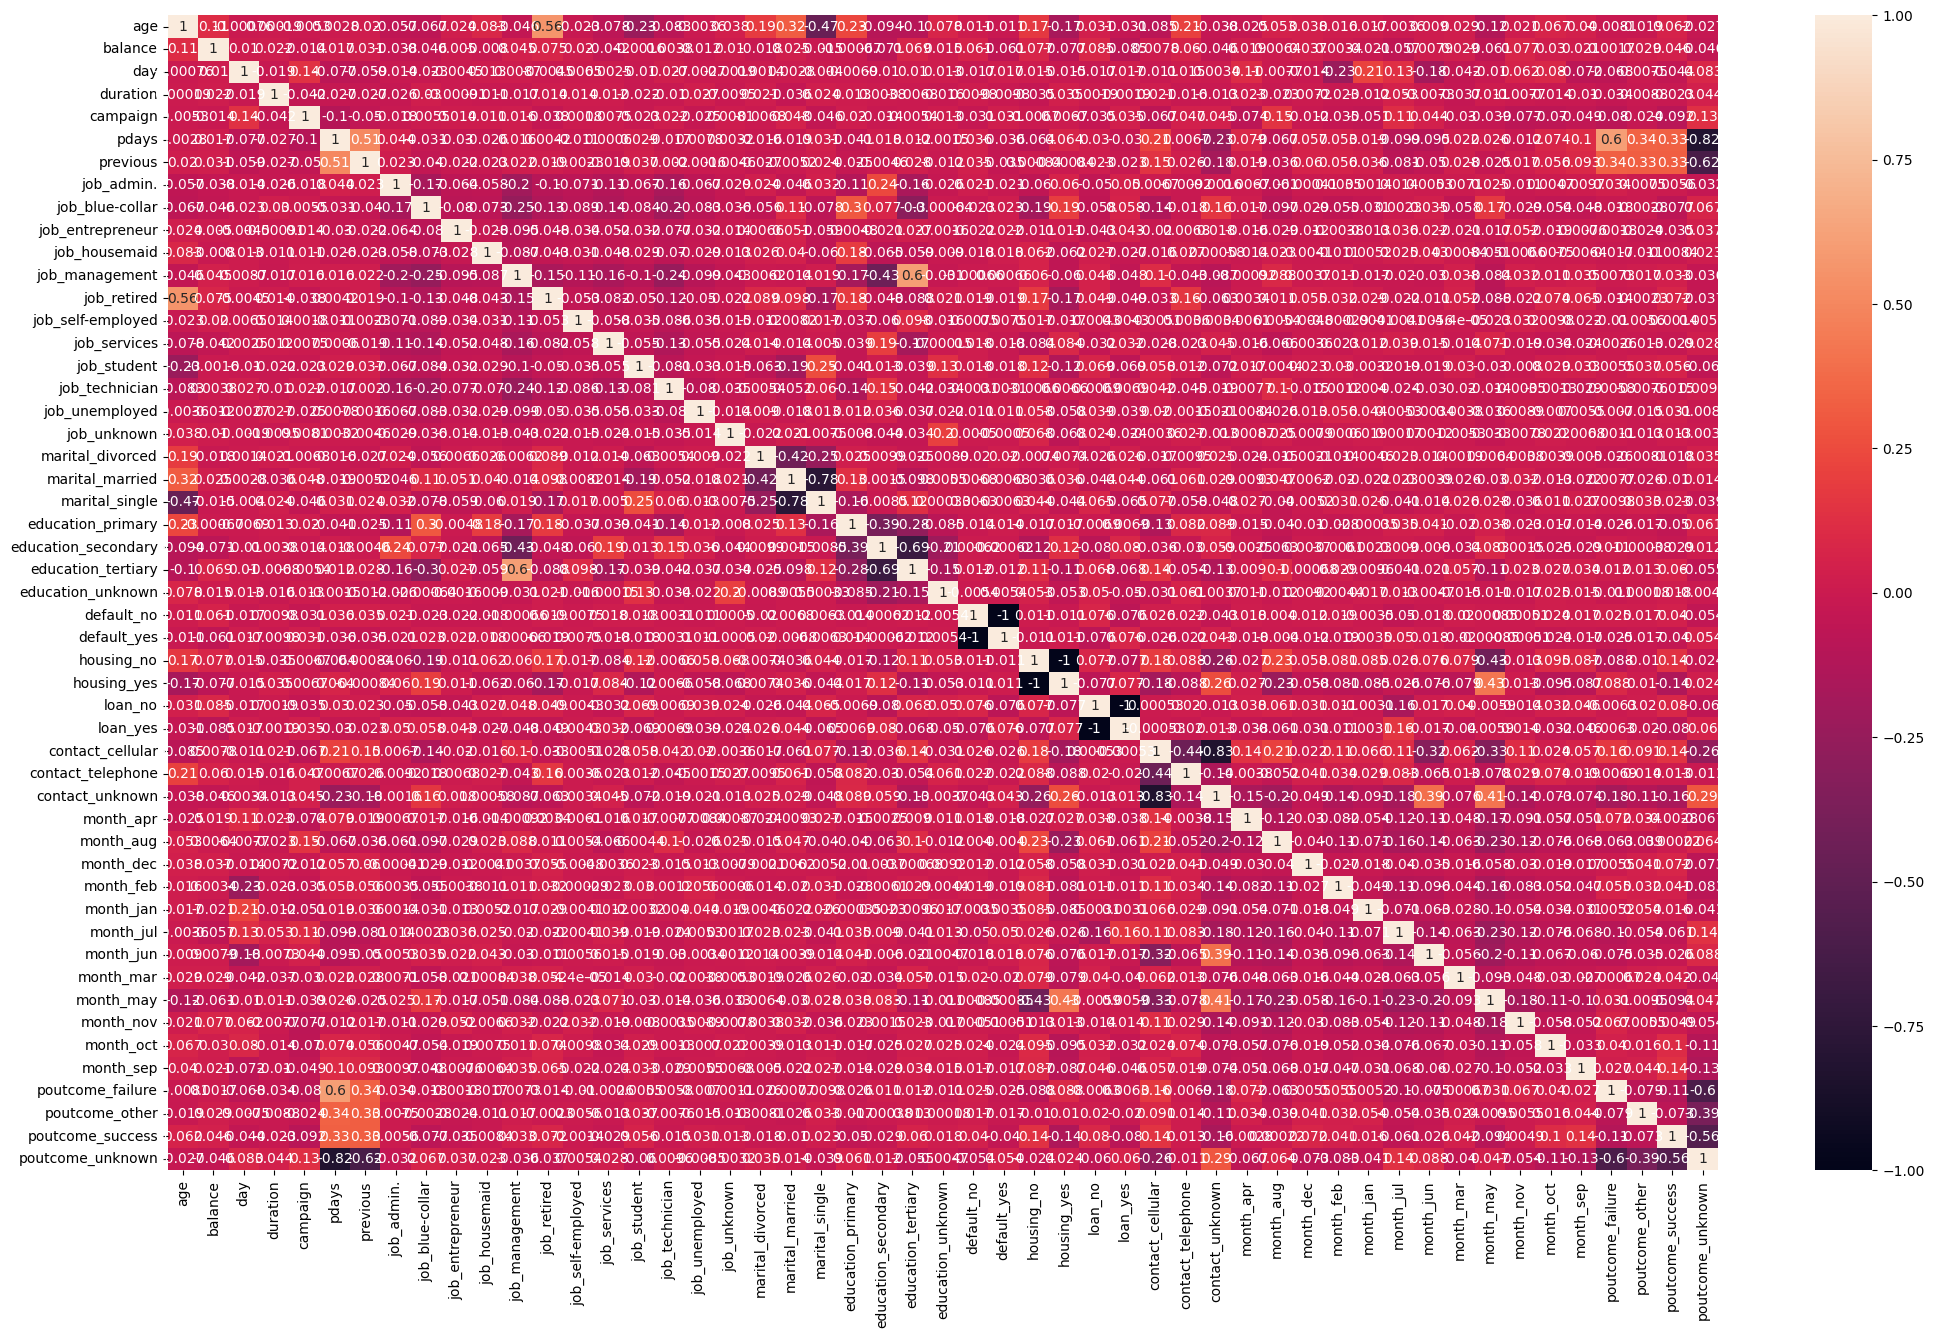

In [ ]:
# Phase two: all predictors, except any that were identified for removal in phase one
cm2 = predictors_df2.corr()
plt.figure(figsize=(25,15))
sns.heatmap(cm2, xticklabels=cm2.columns, yticklabels=cm2.columns, annot=True)

In [ ]:
# Scale predictors

## Cox Proportional Hazards model